In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ANAND\Documents\GitHub\A-study-on-awareness-and-perceptionn-among-the-users-of-EVs\responces.csv")
df = df.drop(columns='Name', axis=1)
df.head()

,Gender,Age,Employment Status,Education Qualification,District,Area of Residence,which type of Vehicle do you have?,Do you have an Electric Vehicle?,1.1 Are electric vehicles better performing compared to fuel vehicles?,1.2 Are electric vehicles easy to drive then fuel vehicles?,...,4.5 How is the resale value of an EV's compared to a traditional fuel vehicles?,5.1 How familiar are you with EV’s and their features?,5.2 Are you attracted to EV’s because of the technological advancement?,5.3 Are you satisfied with the range of EV’s comparing to traditional fuel vehicles?,"5.4 If you were to buy a vehicle, would you consider EV’s?",5.5 What do you think of the government encouraging e-vehicle sales?,6.1 Are electric vehicles polluting like other traditional fuel vehicles?,"6.2 What is your opinion about that the absents of tailpipe emissions from EV’s contributes to better air quality, reducing pollutants that can have adverse effects on human health and the environment?","6.3 Because electric vehicles are soundless than traditional vehicles, do they reduce noise pollution especially in public spaces?",6.4 Are the applications of EV’s support to eco- friendly transportation?
0,Female,18 - 27,Student,Post Graduate,Coimbatore,Urban,Petrol,No,fair,neutral,...,High,familiar,Attracted,Very satisfied,Somewhat considered,Good,Similar to others,Neutral,Reduce,neutral
1,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Diesel,Yes,good,neutral,...,Low,Very unfamiliar,Highly not attracted,moderately satisfied,Somewhat considered,Average,Highly polluting,Useless,Didn't reduce,support
2,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Petrol,Yes,poor,very easy,...,Very low,familiar,Not attracted,Very satisfied,Somewhat considered,Fair,Not polluting,Usefull,Definitely reduce,definitely support
3,Male,18 - 27,Student,Post Graduate,Viruthunagar,Urban,Diesel,Yes,very poor,very hard,...,Neutral,Somewhat familiar,Highly not attracted,moderately satisfied,Not considered,Fair,Similar to others,Usefull,Reduce,neutral
4,Female,18 - 27,Student,Post Graduate,Dharmapuri,Urban,Petrol,No,good,neutral,...,High,familiar,Not attracted,Slightly satisfied,Somewhat considered,Fair,slightly polluting,Neutral,Reduce,neutral


In [3]:
encoder = OneHotEncoder()
df_enc = encoder.fit_transform(df)
print(df_enc)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7035 stored elements and shape (201, 212)>
  Coords	Values
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 7)	1.0
  (0, 12)	1.0
  (0, 19)	1.0
  (0, 70)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 77)	1.0
  (0, 84)	1.0
  (0, 89)	1.0
  (0, 93)	1.0
  (0, 98)	1.0
  (0, 103)	1.0
  (0, 109)	1.0
  (0, 113)	1.0
  (0, 119)	1.0
  (0, 122)	1.0
  (0, 127)	1.0
  (0, 135)	1.0
  (0, 138)	1.0
  (0, 143)	1.0
  (0, 149)	1.0
  (0, 152)	1.0
  (0, 161)	1.0
  :	:
  (200, 91)	1.0
  (200, 93)	1.0
  (200, 99)	1.0
  (200, 106)	1.0
  (200, 109)	1.0
  (200, 113)	1.0
  (200, 117)	1.0
  (200, 124)	1.0
  (200, 131)	1.0
  (200, 135)	1.0
  (200, 138)	1.0
  (200, 145)	1.0
  (200, 148)	1.0
  (200, 153)	1.0
  (200, 157)	1.0
  (200, 166)	1.0
  (200, 168)	1.0
  (200, 175)	1.0
  (200, 178)	1.0
  (200, 185)	1.0
  (200, 191)	1.0
  (200, 194)	1.0
  (200, 198)	1.0
  (200, 205)	1.0
  (200, 209)	1.0


In [4]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(df_enc)
X_scaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7035 stored elements and shape (201, 212)>

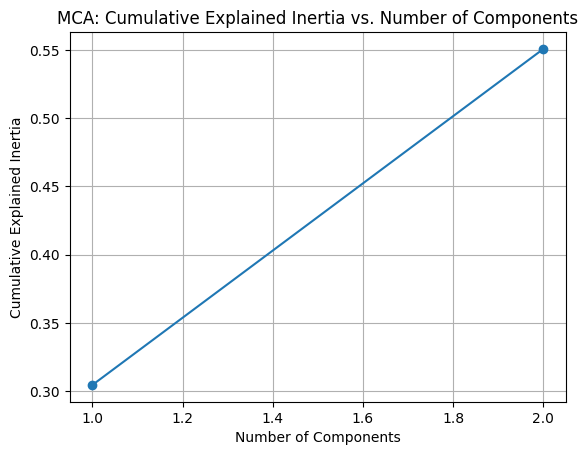

Explained inertia for each component: [0.30466706 0.24603109]


In [8]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Apply MCA without specifying n_components to calculate full inertia
mca = prince.MCA(n_iter=3, copy=True, check_input=True)
mca = mca.fit(df)

# Explained inertia for each component
explained_inertia = mca.eigenvalues_

# Cumulative inertia (cumulative explained variance)
cumulative_inertia = [sum(explained_inertia[:i+1]) for i in range(len(explained_inertia))]

# Plot cumulative inertia to see how much variance is explained by increasing components
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Inertia')
plt.title('MCA: Cumulative Explained Inertia vs. Number of Components')
plt.grid(True)
plt.show()

# Print the explained inertia for each component
print("Explained inertia for each component:", explained_inertia)


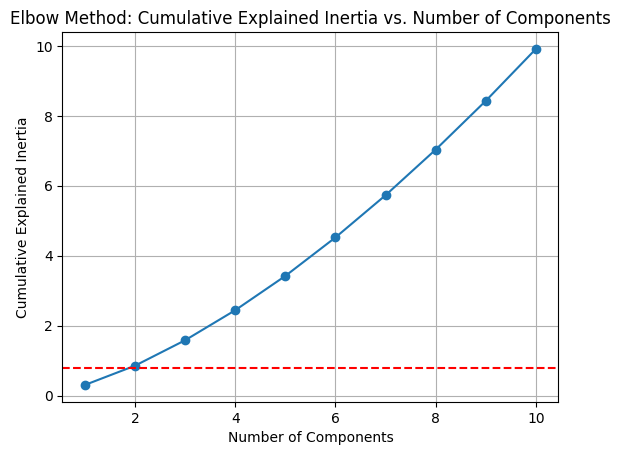

Total explained inertia for 1 components: 0.3047
Total explained inertia for 2 components: 0.5511
Total explained inertia for 3 components: 0.7276
Total explained inertia for 4 components: 0.8585
Total explained inertia for 5 components: 0.9803
Total explained inertia for 6 components: 1.1007
Total explained inertia for 7 components: 1.2070
Total explained inertia for 8 components: 1.3040
Total explained inertia for 9 components: 1.3950
Total explained inertia for 10 components: 1.4844


In [7]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Create a DataFrame with 36 features
# Note: This is just a sample; ensure your actual data contains 36 features
# Fit MCA with a range of components
max_components = min(df.shape[1], 10)  # Set a max limit for components to test
explained_inertia = []

for n_components in range(1, max_components + 1):
    mca = prince.MCA(n_components=n_components, n_iter=3, copy=True, check_input=True)
    mca = mca.fit(df)
    # Get the eigenvalues and calculate the explained inertia (variance)
    inertia = mca.eigenvalues_
    explained_inertia.append(inertia.sum())  # Total explained inertia

# Cumulative inertia (cumulative explained variance)
cumulative_inertia = [sum(explained_inertia[:i+1]) for i in range(len(explained_inertia))]

# Plot cumulative inertia to find the elbow
plt.plot(range(1, len(cumulative_inertia) + 1), cumulative_inertia, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Inertia')
plt.title('Elbow Method: Cumulative Explained Inertia vs. Number of Components')
plt.axhline(y=0.8, color='r', linestyle='--')  # Optional: horizontal line at 80% inertia
plt.grid(True)
plt.show()

# Print explained inertia for each component
for i, inertia in enumerate(explained_inertia, start=1):
    print(f"Total explained inertia for {i} components: {inertia:.4f}")


the optimal number of components using the elbow method and the criteria for capturing a significant amount of variance.

Explained Inertia Summary:

1. Component: 30.47%
2. Components: 55.11%
3. Components: 72.76%
4. Components: 85.85%
5. Components: 98.03%
6. Components: 110.07%
7. Components: 120.70%
8. Components: 130.40%
9. Components: 139.50%
10. Components: 148.44%

Guidelines to Determine Optimal Components:

Cumulative Explained Inertia:

It is common to aim for at least 70% to 90% cumulative explained inertia in practice.
In your results, the first four components already explain 85.85% of the inertia, which is a significant amount.

Look for the Elbow:

In the elbow method, you're looking for a point where adding more components results in smaller incremental increases in explained inertia. In your case, after the 4th component, the increase in explained inertia is less pronounced.

The 5th component contributes a little more inertia (98.03%) but the change from the 4th to the 5th is relatively small compared to the jump from the 3rd to the 4th component.

Recommendation:

Optimal Number of Components: 4 Components

It captures 85.85% of the total inertia, which is typically sufficient for many analyses, and it balances complexity and explanatory power.
If you prefer a higher percentage of variance explained (around 90%), you could consider using 5 components as well.

Conclusion:

In summary, based on the elbow method and the explained inertia percentages, 4 components would be a suitable choice for your analysis, with 5 components being a potential alternative if you want to capture slightly more variance.

MCA Transformed Data (first 5 rows):
          0         1         2
0 -0.572980  0.218259 -0.121237
1 -0.804228  1.210127  0.583203
2 -0.052828  0.442965  0.510170
3 -0.564788  0.964279  0.686089
4 -0.512704  0.177614 -0.326193

Variable Coordinates (first 5 variables):
                      0         1         2
Gender_Female -0.266095  0.026944 -0.486770
Gender_Male    0.100241 -0.010150  0.183372
Age_18 - 27   -0.160934  0.223525 -0.122616
Age_28 - 43    0.421441 -0.606865  0.281078
Age_44 - 59    0.242695 -0.202613  0.435022

Variable Contributions to Components:
Component 1: 42.03%
Component 2: 33.89%
Component 3: 24.08%


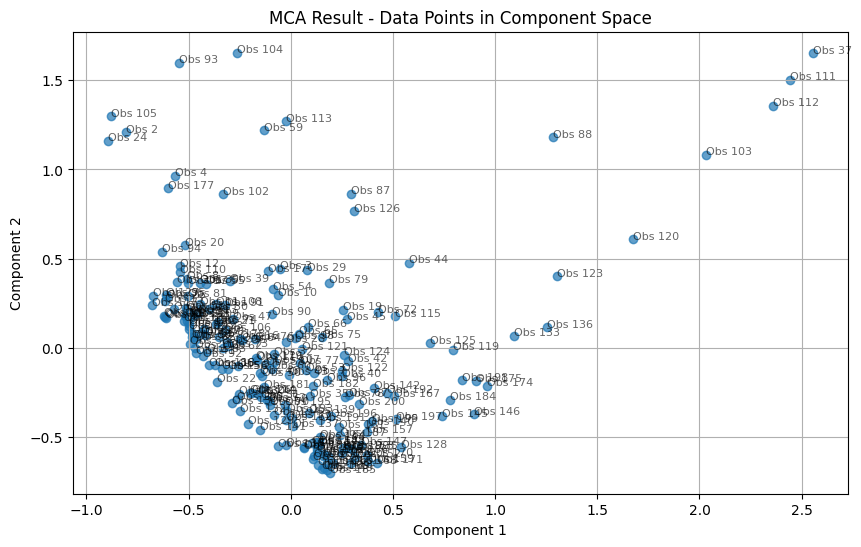


Variable Coordinates (first 5 variables):
                      0         1         2
Gender_Female -0.266095  0.026944 -0.486770
Gender_Male    0.100241 -0.010150  0.183372
Age_18 - 27   -0.160934  0.223525 -0.122616
Age_28 - 43    0.421441 -0.606865  0.281078
Age_44 - 59    0.242695 -0.202613  0.435022

Variable Contributions to Components:
Component 1: 42.03%
Component 2: 33.89%
Component 3: 24.08%


In [15]:

n_components = 3
mca = prince.MCA(n_components=n_components, n_iter=3, copy=True, check_input=True)
mca = mca.fit(df)

# Transform the dataset into the new MCA dimensions
mca_transformed = mca.transform(df)

# Print the MCA transformed data
print("MCA Transformed Data (first 5 rows):")
print(mca_transformed.head())

# Get the coordinates of the variables
variable_coordinates = mca.column_coordinates(df)

# Print variable coordinates
print("\nVariable Coordinates (first 5 variables):")
print(variable_coordinates.head())

# Get the contributions of the variables
contributions = mca.eigenvalues_ / mca.eigenvalues_.sum() * 100  # Convert to percentage
print("\nVariable Contributions to Components:")
for i in range(n_components):
    print(f"Component {i + 1}: {contributions[i]:.2f}%")

# Plot the data points in the MCA space
plt.figure(figsize=(10, 6))
plt.scatter(mca_transformed.iloc[:, 0], mca_transformed.iloc[:, 1], alpha=0.7)

# Optional: Add labels to the data points (for clarity)
for i in range(mca_transformed.shape[0]):
    plt.annotate(f"Obs {i+1}", (mca_transformed.iloc[i, 0], mca_transformed.iloc[i, 1]), fontsize=8, alpha=0.6)

plt.title('MCA Result - Data Points in Component Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()

# Get the coordinates of the variables
variable_coordinates = mca.column_coordinates(df)

# Print variable coordinates
print("\nVariable Coordinates (first 5 variables):")
print(variable_coordinates.head())

# Get the contributions of the variables
contributions = mca.eigenvalues_ / mca.eigenvalues_.sum() * 100  # Convert to percentage
print("\nVariable Contributions to Components:")
for i in range(n_components):
    print(f"Component {i + 1}: {contributions[i]:.2f}%")


MCA Transformed Data (first 5 rows):
          0         1         2
0 -0.574087  0.210780 -0.141170
1 -0.797302  1.228444  0.630158
2 -0.057070  0.446276  0.509078
3 -0.571692  0.993456  0.574194
4 -0.516330  0.191335 -0.344697
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 594.0
Best run was number 1
Cluster Centers:
[[-0.88531872 -0.69295502 -0.66050491]
 [-0.9004695   1.13149122  1.81373245]
 [-0.24536983  0.05

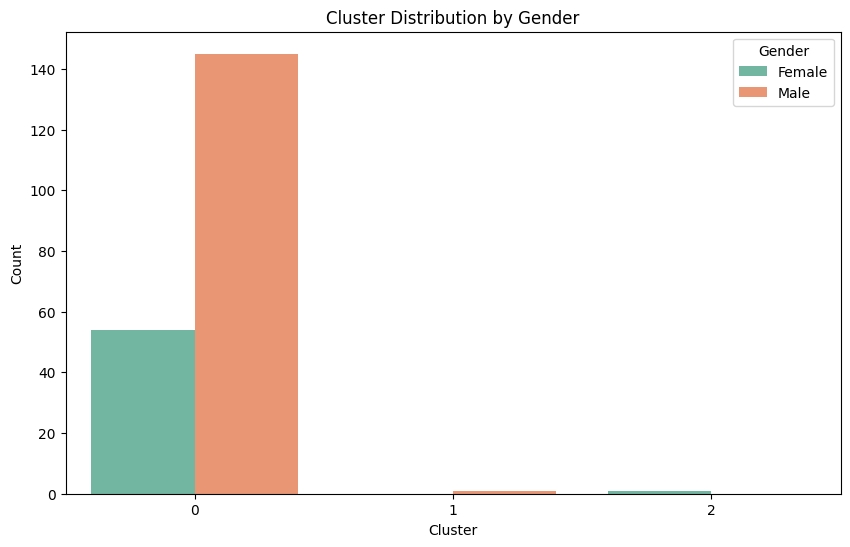


Cluster 0:
       Gender      Age Employment Status Education Qualification   \
count     199      199               199                      199   
unique      2        3                 4                        6   
top      Male  18 - 27           Student           Under Graduate   
freq      145      142                87                      101   
mean      NaN      NaN               NaN                      NaN   
std       NaN      NaN               NaN                      NaN   
min       NaN      NaN               NaN                      NaN   
25%       NaN      NaN               NaN                      NaN   
50%       NaN      NaN               NaN                      NaN   
75%       NaN      NaN               NaN                      NaN   
max       NaN      NaN               NaN                      NaN   

           District Area of Residence which type of Vehicle do you have?  \
count           199               199                                199   
unique 

In [16]:
import seaborn as sns
from kmodes.kmodes import KModes

# Fit MCA with 4 components
n_components = 3
mca = prince.MCA(n_components=n_components, n_iter=3, copy=True, check_input=True)
mca = mca.fit(df)

# Transform the dataset into the new MCA dimensions
mca_transformed = mca.transform(df)

# Display the transformed data
print("MCA Transformed Data (first 5 rows):")
print(mca_transformed.head())

# Perform K-Modes clustering on the MCA transformed data
n_clusters = 3  # Specify the number of clusters
kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(mca_transformed)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Print cluster centers
print("Cluster Centers:")
print(kmodes.cluster_centroids_)

# Print the number of data points in each cluster
print("\nNumber of data points in each cluster:")
print(df['Cluster'].value_counts())

# Visualize the clusters (use a subset of features for 2D plotting)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender', palette='Set2')
plt.title('Cluster Distribution by Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Optional: Analyze the clusters
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i].describe(include='all'))  # Summary statistics for each cluster

In [17]:
df['Cluster'].value_counts()

Cluster
0    199
2      1
1      1
Name: count, dtype: int64

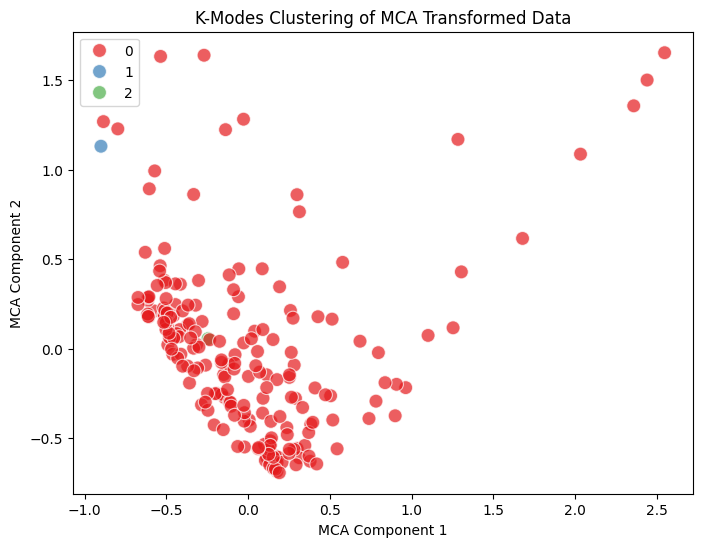

In [19]:
# Assuming mca_transformed is already in 2D (e.g., first two components)
plt.figure(figsize=(8, 6))

# Create a scatter plot, coloring by cluster
sns.scatterplot(x=mca_transformed.iloc[:, 0], y=mca_transformed.iloc[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)

# Set labels and title
plt.title('K-Modes Clustering of MCA Transformed Data')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')

# Display the plot
plt.show()